Exercise 1: NumPy Array Operations and Geospatial Coordinates
In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).

Convert the latitude and longitude values from degrees to radians using np.radians().

Calculate the element-wise difference between Tokyo and the other cities’ latitude and longitude in radians.

In [3]:
import numpy as np

In [4]:
city_data = np.array([
    ["Tokyo", 35.6895, 139.6917],
    ["New York", 40.7128, -74.0060],
    ["London", 51.5074, -0.1278],
    ["Paris", 48.8566, 2.3522]
])
coordinates = city_data[:, 1:].astype(float)
new_cord = np.radians(coordinates)
new_cord

array([[ 6.22899283e-01,  2.43808010e+00],
       [ 7.10572408e-01, -1.29164837e+00],
       [ 8.98973719e-01, -2.23053078e-03],
       [ 8.52708531e-01,  4.10536347e-02]])

In [9]:
tokyo_rad = new_cord[0]
new_cord_diff = tokyo_rad - new_cord[1:]
print(new_cord_diff)

[[-0.08767312  3.72972847]
 [-0.27607444  2.44031063]
 [-0.22980925  2.39702647]]


Exercise 2: Pandas DataFrame Operations with Geospatial Data
In this exercise, you’ll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

Load the world cities dataset from this URL using Pandas: [opengeos/datasets](https://github.com/opengeos/datasets/releases/download/world/world_cities.csv)

Display the first 5 rows and check for missing values.

Filter the dataset to only include cities with a population greater than 1 million.

Group the cities by their country and calculate the total population for each country.

Sort the cities by population in descending order and display the top 10 cities.



In [11]:
import pandas as pd


In [12]:
df = pd.read_csv('https://github.com/opengeos/datasets/releases/download/world/world_cities.csv')
df.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [15]:
high_population = df[df['population'] > 1000000]
high_population.head()

,id,name,country,latitude,longitude,population
97,98,Turin,ITA,45.07039,7.66996,1652000
103,104,Lille,FRA,50.64997,3.08001,1044000
123,124,San Bernardino,USA,34.12038,-117.30003,1745000
124,125,Bridgeport,USA,41.17998,-73.19996,1018000
126,127,Manchester,GBR,53.50042,-2.24799,2230000


In [19]:
df_country = df.groupby('country')
df_country.population.sum()

country
AFG     4931702
AGO     6821544
ALB      895350
ALD       10682
AND       53998
         ...   
WSM       61916
YEM     3759000
ZAF    13373789
ZMB     2326947
ZWE     2611745
Name: population, Length: 200, dtype: int64

In [22]:
df_sorted = df.sort_values(by='population', ascending=False)
df_sorted.head(10)

,id,name,country,latitude,longitude,population
1239,1240,Tokyo,JPN,35.68502,139.75141,35676000
1224,1225,New York,USA,40.74998,-73.98002,19040000
1230,1231,Mexico City,MEX,19.44244,-99.13099,19028000
1240,1241,Mumbai,IND,19.01699,72.85699,18978000
1245,1246,Sao Paulo,BRA,-23.55868,-46.62502,18845000
1148,1149,Delhi,IND,28.66999,77.23000,15926000
1238,1239,Shanghai,CHN,31.21645,121.43650,14987000
1243,1244,Kolkata,IND,22.49497,88.32468,14787000
1175,1176,Dhaka,BGD,23.72306,90.40858,12797394
1217,1218,Buenos Aires,ARG,-34.60250,-58.39753,12795000


Exercise 3: Creating and Manipulating GeoDataFrames with GeoPandas
This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

Load the New York City building dataset from the GeoJSON file using GeoPandas: [opengeos/datasets](https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson)

Create a plot of the building footprints and color them based on the building height (use the height_MS column).

Create an interactive map of the building footprints and color them based on the building height (use the height_MS column).

Calculate the average building height (use the height_MS column).

Select buildings with a height greater than the average height.

Save the GeoDataFrame to a new GeoJSON file.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gpdf = gpd.read_file(url)
gpdf.head()

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."


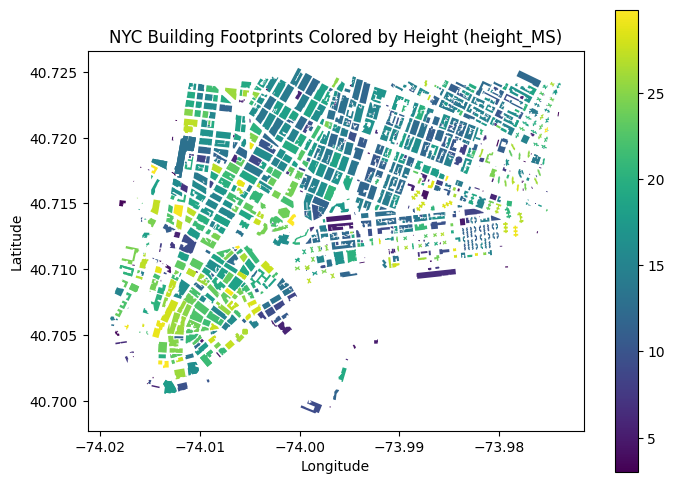

In [24]:
gpdf.plot(column='height_MS', figsize=(8, 6), legend=True)
plt.title("NYC Building Footprints Colored by Height (height_MS)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [7]:
gpdf

,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."
...,...,...,...,...,...,...,...,...
1201,9764,26.54,22.30,24.42,696.24,36,New York,"POLYGON ((-73.97463 40.72411, -73.97467 40.724..."
1202,9765,10.44,16.53,13.48,2859.96,36,New York,"POLYGON ((-73.98495 40.71911, -73.98436 40.718..."
1203,9766,10.44,13.87,12.16,2859.96,36,New York,"POLYGON ((-73.98495 40.71911, -73.98436 40.718..."
1204,9774,13.76,NaN,13.76,1612.84,36,New York,"POLYGON ((-73.99154 40.71045, -73.99173 40.710..."


In [10]:
ave_height = gpdf["height_MS"].mean()

<Axes: >

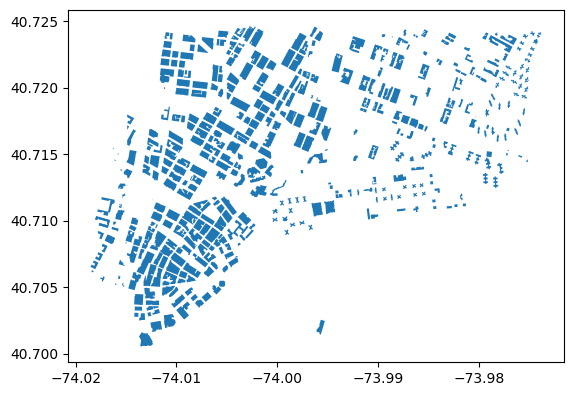

In [12]:
gpdf[gpdf["height_MS"] > ave_height].plot()


In [14]:
gpdf.to_file("nyc_buildings.geojson")


In [16]:
gpdf_2263 = gpdf.to_crs(epsg=2263)
gpdf_2263.to_file("nyc_buildings_2263.geojson")


Exercise 4: Combining NumPy, Pandas, and GeoPandas
This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

Use Pandas to load the world cities dataset from this URL: [opengeos/datasets](https://github.com/opengeos/datasets/releases/download/world/world_cities.csv)

Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).

Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.

Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).

Calculate the distance (in meters) between each city and the city of Paris.

Plot the cities on a world map, coloring the points by their distance from Paris.

In [19]:
import numpy as np
import pandas as pd

In [22]:
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"

df = pd.read_csv(url)
df.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [26]:
north_df = df[(df["latitude"] > -40) & (df["latitude"] < 60)]
north_df.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [28]:
cities_gdf = gpd.GeoDataFrame(
    north_df, geometry=gpd.points_from_xy(north_df.longitude, north_df.latitude), crs="EPSG:3857"
)
cities_gdf.head()


,id,name,country,latitude,longitude,population,geometry
0,1,Bombo,UGA,0.5833,32.5333,75000,POINT (32.533 0.583)
1,2,Fort Portal,UGA,0.6710,30.2750,42670,POINT (30.275 0.671)
2,3,Potenza,ITA,40.6420,15.7990,69060,POINT (15.799 40.642)
3,4,Campobasso,ITA,41.5630,14.6560,50762,POINT (14.656 41.563)
4,5,Aosta,ITA,45.7370,7.3150,34062,POINT (7.315 45.737)


In [34]:
cities_gdf["centroid"] = cities_gdf.geometry.centroid

paris_loc = cities_gdf.loc[cities_gdf["name"] == "Paris", "centroid"]

cities_gdf["distance_to_paris"] = cities_gdf.centroid.distance(paris_loc.values[0])

cities_gdf["distance_to_paris"]

0        56.950183
1        55.709612
2        15.778768
3        14.324519
4         5.883188
           ...    
1244     85.027136
1245     87.420565
1246    170.324713
1247    112.116310
1248    114.962257
Name: distance_to_paris, Length: 1132, dtype: float64

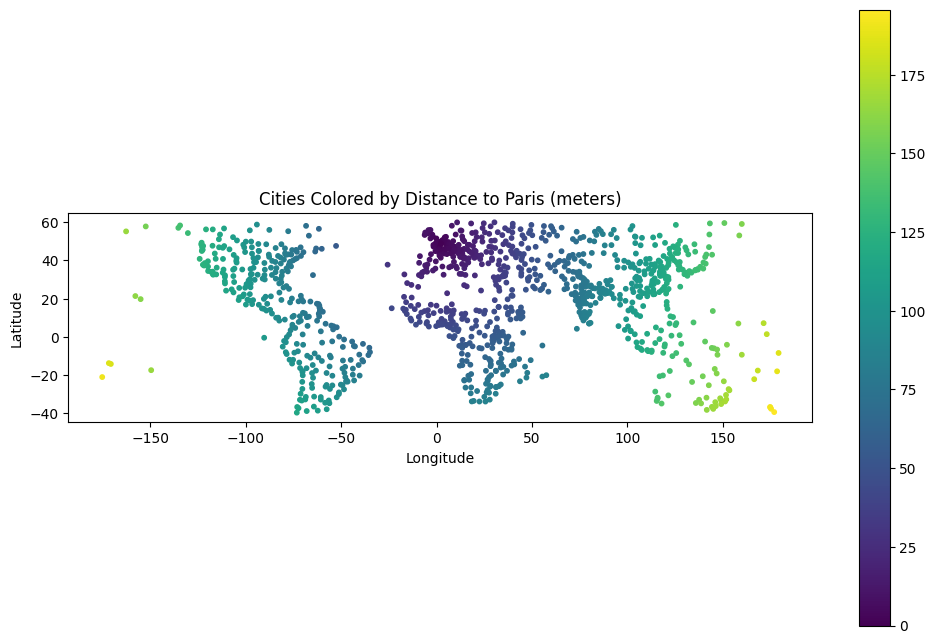

In [37]:
cities_gdf.plot(
    column="distance_to_paris",
    cmap="viridis",
    legend=True,
    figsize=(12, 8),
    markersize=10
)
plt.title("Cities Colored by Distance to Paris (meters)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()